# Final project

## About the dataset
 
The dataset is a collection of annotated English tweets designed to detect hate speech and offensive language.

The dataset contains columns for tweet classification:
- count:	The total number of annotations for each tweet.
- hate_speech_count:	The number of annotations classifying a tweet as hate speech. 
- offensive_language_count:	The number of annotations classifying a tweet as offensive language. 
- neither_count:	The number of annotations classifying a tweet as neither hate speech nor offensive language. 
- class: 0 hate speech, 1 offensive language, 2 neither
- tweet: text tweet

Data source: Huggingface (https://huggingface.co/datasets/hate_speech_offensive)

## Hate Speech and Offensive Language Detection on Twitter

### Import Libraries

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud #Cloud graph
import nltk
from nltk.tokenize import word_tokenize      #to divide strings into lists of substrings
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

### Data Visualization

In [165]:
# Read the CSV file into a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/carolinavivast/Datasets/main/Hate_Speech_Detection.csv")
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


The data doesn't have missing values

In [167]:
#Unique values in each column
data.nunique()

count                           5
hate_speech_count               8
offensive_language_count       10
neither_count                  10
class                           3
tweet                       24783
dtype: int64

In [168]:
#Checking on unique values
data['class'].unique()

array([2, 1, 0], dtype=int64)

In [169]:
#class hate
hate = data[data['class']==0]
hate.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [170]:
#Checking on specific examples
data.iloc[110]['tweet']

'"@DevilGrimz: @VigxRArts you\'re fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn'

Adding a new column to this dataset as labels:
1. Hate Speech
2. Offensive Language
3. No Hate and Offensive

In [171]:
data["labels"] = data["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [172]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [173]:
fig = px.histogram(data, x='labels', 
                   title='Tweet classification distribution', 
                   color_discrete_sequence=['#3498db']
                   )
# We add a line width around each bar
fig.update_traces(marker=dict(line=dict(width=1)))
fig.show()

In [174]:
fig = px.pie(data, names='labels', 
                   title='Distribution of sentiments')
# We add a line width
fig.update_traces(marker=dict(line=dict(width=1)))
fig.show()

According to the graph, "Offensive Language" stands out as the category with the highest count among all the categories.

### Data prepocessing

Filter out noise, such as special characters, URLs, punctuation, and stopwords, which can interfere with the accuracy of the analysis.

Steps: 
- Lowercasing (ensures consistency and avoids duplication of words)
- URLs removal
- HTML tags removal
- Punctuation Removal
- Newline Removal
- Numeric Removal


In [175]:
#articles, pronouns, conjunctions, 
#and other frequently occurring words that do not add much value to the analysis.
stopword = set(stopwords.words('english'))

In [176]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) # Removing text within square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # Removing URLs
    text = re.sub('<.*?>+', '', text) # Removing HTML tags
    text = re.sub('rt', '', text) # Removing HTML tags
    text = re.sub("\@w+|\#", '', text)  # Removing @ and #
    text = re.sub("[^\w\s]", '', text)  # Removing non-alphanumeric characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text) # Removing newline characters
    text = re.sub('\w*\d\w*', '', text) # Removing words containing numbers
    text = [word for word in text.split(' ') if word not in stopword] # Removing stopwords
    text=" ".join(text)
    return text

In [177]:

#applying pre-processing to text data
data['tweet']=data['tweet'].apply(clean)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21432\282898726.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
data

,tweet,labels
0,mayasolovely woman shouldnt complain cleanin...,No Hate and Offensive
1,boy dats coldtyga dwn bad cuffin dat hoe p...,Offensive Language
2,urkindofbrand dawg ever fuck bitch sta cry...,Offensive Language
3,cganderson vivabased look like tranny,Offensive Language
4,shenikarobes shit hear might true might fake...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youve gone broke wrong hea baby drove redneck ...,No Hate and Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitches tellin lies,Offensive Language


In [179]:
data.iloc[110]['tweet']

'devilgrimz vigxras youre fucking gay blacklisted hoe holding tehgodclan anyway '

Visualizing non-hate tweets

In [180]:
non_hate = data[data.labels=='No Hate and Offensive']

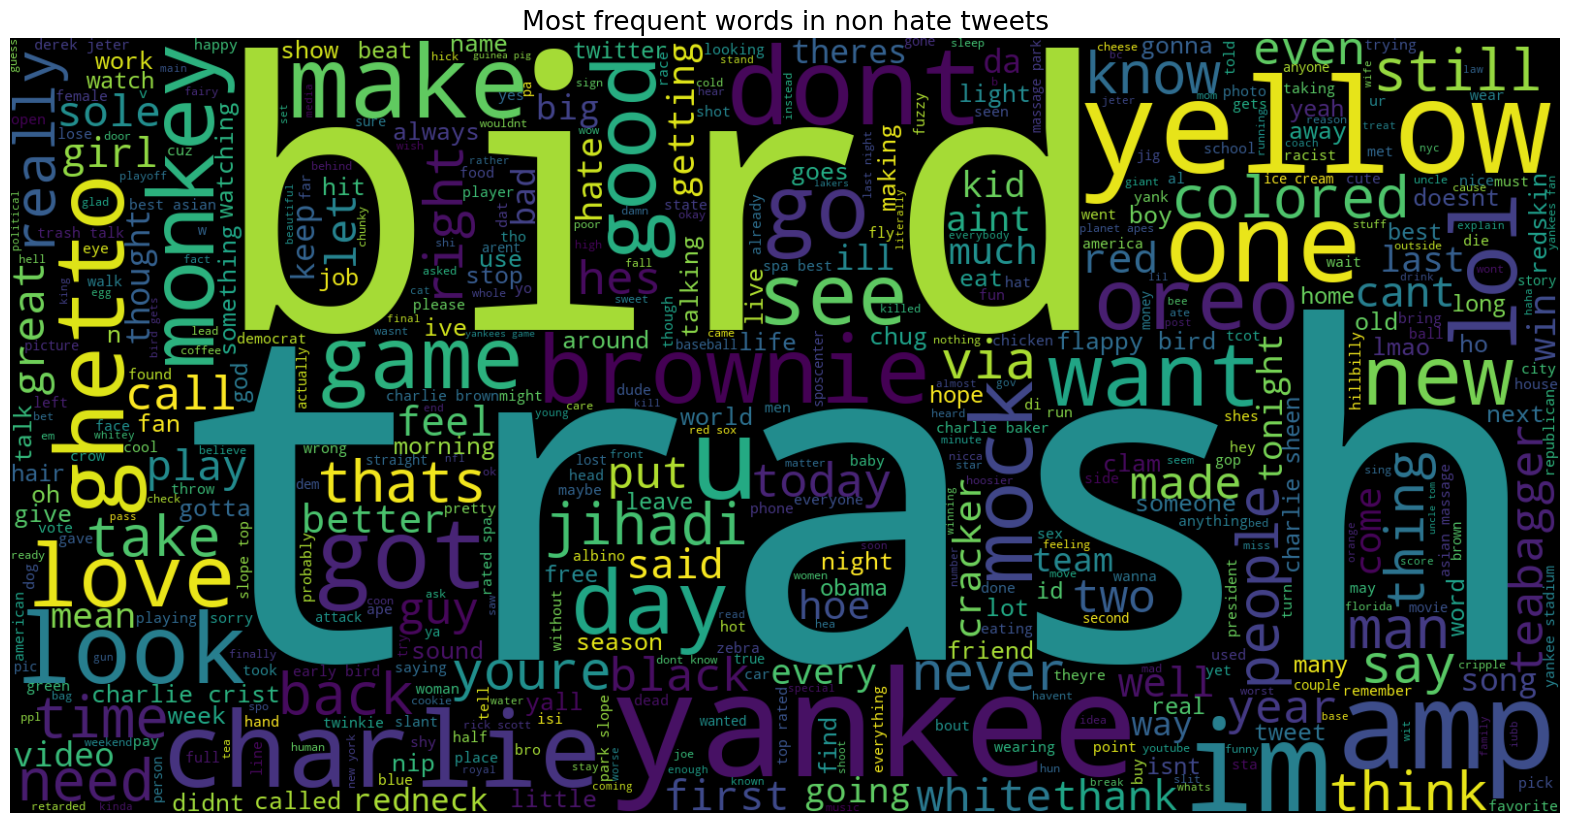

In [181]:
# visualizing non-hate tweets using word cloud
text=''.join([word for word in non_hate['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()

In [182]:
import numpy as np
#separating the data into x and y to build the model
X = np.array(data["tweet"])
Y = np.array(data["labels"])
vect = CountVectorizer() # Create an instance of CountVectorizer
X = vect.fit_transform(X) # Fit the vectorizer on the training data and transform 

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#The random_state parameter is set to 42, ensuring that the same split is obtained every time the code is executed.


In [184]:
#printing the size of training and testing data
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (19826, 30079)
Size of Y_train (19826,)
Size of X_test (4957, 30079)
Size of Y_test (4957,)


### Model Training & Testing

In [185]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [186]:
y_pred = model.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.8718983256001613


In [188]:
example = "You are too bad and I don't like your attitude"
example = vect.transform([example]).toarray()
print('"Test accuracy:',model.predict((example)))

"Test accuracy: ['No Hate and Offensive']


In [189]:
example = input()
print(example)
example = vect.transform([example]).toarray()
print(model.predict((example)))

bitch
['Offensive Language']


DONE)